# Homework 02 — IANNwTF
## Group 27
Deadline: Nov 7, 2021 23:59

<https://forms.gle/8qwiuUXCfLjKGeg67>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 15     # Bigger font in figures
%config InlineBackend.figure_format = 'retina'

### Sigmoid function and its derivative

$\sigma(x) = \frac{1}{1+e^{-x}}$

Derivative (`sigmoidprime`):

$\sigma'(x)= \sigma(x)(1-\sigma(x))$

In [2]:
# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Dataset

In [3]:
# data set
# inputs
mlp_input = np.array([[0,0],[0,1],[1,0],[1,1]])

# labels
labels_and = np.array([0,0,0,1]).reshape((4, 1))
labels_or = np.array([0,1,1,1]).reshape((4, 1))
labels_nand = np.array([1,1,1,0]).reshape((4, 1))
labels_nor = np.array([1,0,0,0]).reshape((4, 1))
labels_xor = np.array([0,1,1,0]).reshape((4, 1))

### Perceptron

Initialised with random weights for the inputs and the bias. Learning rate $\alpha = 1$.

To update the parameters, gradients are computed using:

$ \frac{\partial L}{\partial w_{ij}^{(l)}} = \delta^{(l)}_i a_j^{(l-1)}$

And then the parameters are updated using:

$ \theta_{new} = \theta_{old} - \alpha \nabla L_\theta $

In [7]:
class Perceptron():
    def __init__(self, n_inputs, alpha=1):
        self.alpha = alpha
        self.weights = np.random.randn(n_inputs + 1) # initialise weights with random values from a normal distribution; +1 is for the bias
        
    def forward_step(self, inputs):
        self.input = np.insert(inputs, 0, 1) # bias - input to the bias is 1
        self.drive = np.dot(self.weights, self.input)
        self.output = sigmoid(self.drive) # activation
        return self.output
    
    def update(self, delta):
        gradients = delta * self.input
        self.weights -= self.alpha * gradients

### Multi-Layer Perceptron

In [8]:
class MLP():
    def __init__(self):
        # hidden layer with 4 perceptrons
        self.hidden = [Perceptron(2) for i in range(4)]
        # output layer with one perceptron
        self.output = Perceptron(4)
    
    def forward_step(self, inputs):
        # compute output of the hidden layer perceptrons
        self.hidden_output = np.array([perceptron.forward_step(inputs) for perceptron in self.hidden])
        # give output of the hidden layer to the ouput layer perceptron
        return self.output.forward_step(self.hidden_output)
    
    def backprop_step(self, inputs, target):
        # compute delta for the ouput layer neuron
        delta_output = (self.output.output - target) * sigmoidprime(self.output.drive)
        
        # update weights for each hidden layer perceptron
        for i, perceptron in enumerate(self.hidden):
            delta = delta_output * self.output.weights[i] * sigmoidprime(perceptron.drive)
            perceptron.update(delta)
        # update the output perceptron's weights
        self.output.update(delta_output)

### Training

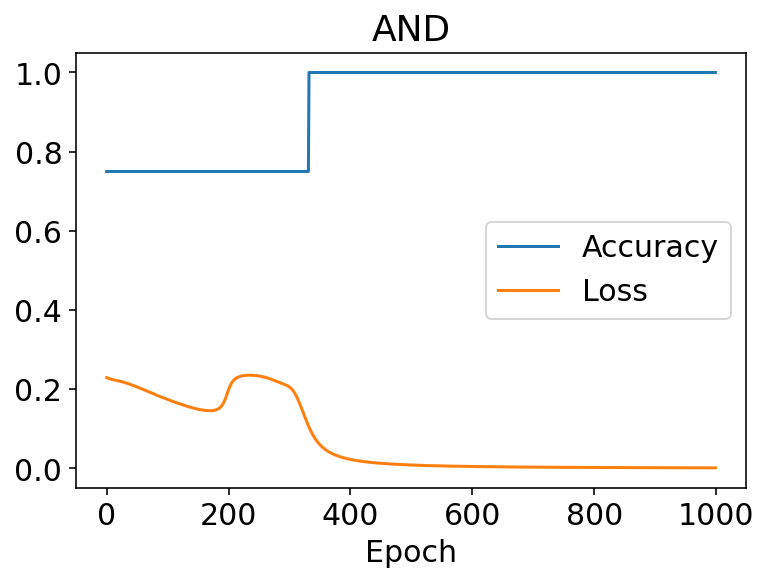

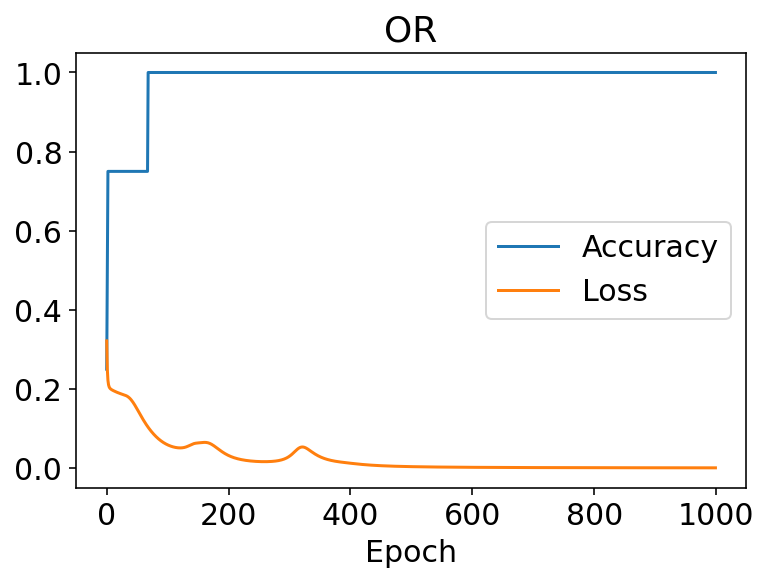

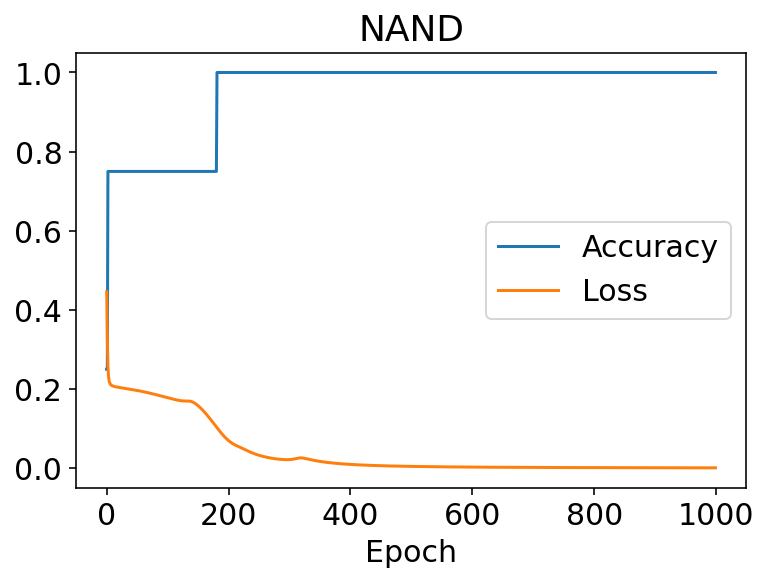

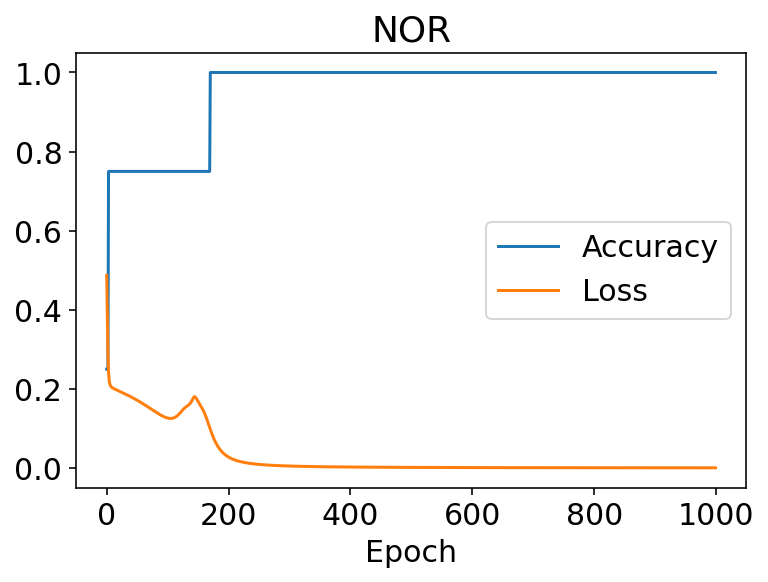

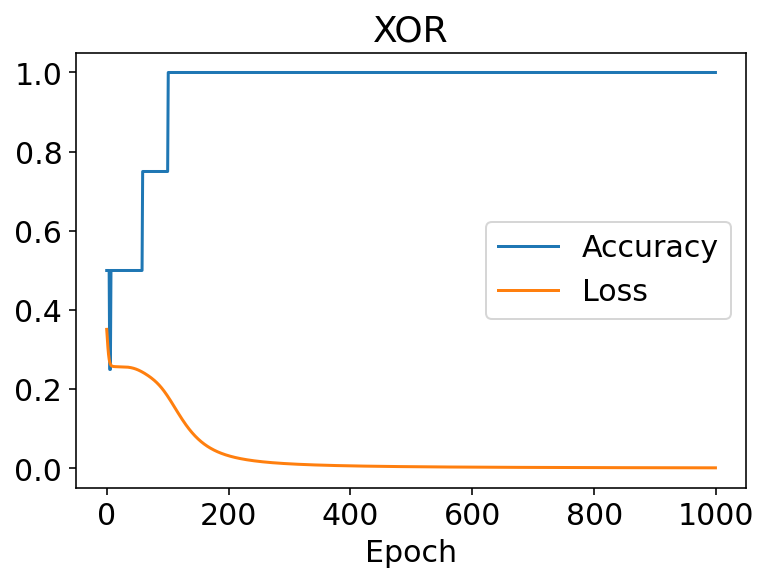

In [13]:
def train_mlp(inputs, labels, title):
    """Train a multilayer perceptron, and plot loss and accuracy
    Args:
    inputs: Input to the MLP
    labels: Target labels (labels_and, labels_xor)
    title:  Plot title ("AND", "XOR")
    """
    mlp = MLP()
    epochs = 1000
    overall_loss = []
    overall_accuracy = []
    for epoch in range(epochs):
        losses = 0
        correct = 0 # number of correct predictions in this epoch

        # iterate through the training samples
        for i, target in zip(inputs, labels):
            pred = mlp.forward_step(i)
            mlp.backprop_step(i, target)

            # loss function: squared error
            loss = (target - pred) ** 2
            losses += loss
            
            # threshold of .5
            if pred >= 0.5:
                pred = 1
            elif pred < 0.5:
                pred = 0

            if pred == target:
                correct += 1
        
        # average correctness for this epoch
        accuracy = correct / len(labels)
        
        # average loss for this epoch
        loss = losses / len(labels)
        
        # store losses and accuracies for plotting
        overall_loss.append(loss)
        overall_accuracy.append(accuracy)
        
    # plot accuracy and loss
    plt.plot(range(epochs), overall_accuracy, label="Accuracy")
    plt.plot(range(epochs), overall_loss, label="Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

# train for each of the five logical gates
train_mlp(mlp_input, labels_and, "AND")
train_mlp(mlp_input, labels_or, "OR")
train_mlp(mlp_input, labels_nand, "NAND")
train_mlp(mlp_input, labels_nor, "NOR")
train_mlp(mlp_input, labels_xor, "XOR")